# Variance of gradient and initialization strategies


In this notebook, we see $\text{Var}\langle \partial C(\boldsymbol{\theta})/\partial \theta_i\rangle$ for some inilization strategies of parameters $\boldsymbol{\theta}$.

<font size="3">
3 Initialization Strategies:

- Small : $\theta \sim \mathcal{U}(0, \pi/(\#\mathrm{qubits} \times \#\mathrm{layers}))$
- Gaussian : $\theta \sim \mathcal{N}(0, \pi/(\#\mathrm{ObservableLocality} \times \#\mathrm{layers}))$
- Random: $\theta \sim \mathcal{U}(0, 2\pi)$
- MBL   : below (from [Hardware-efficient ansatz without barren plateaus in any depth](http://arxiv.org/abs/2403.04844))

<img src="./MBL.png" width="800"/>

In [1]:
import pickle
import sys
import matplotlib.pyplot as plt

import pennylane as qml
from pennylane import numpy as np

sys.path.append('..')
from src.avoid_BP_HEA import BarrenPlateau

## $\text{Var}\langle \partial C(\mathbf{\theta})/\partial \theta_i\rangle$ vs the number of qubits


 Small initialization
0: ──RX(0.07)──RZ(0.27)─╭●─────||──RX(0.20)──RZ(0.31)─╭●─────||─┤  <Y>
1: ──RX(0.11)──RZ(0.20)─╰Z─╭●──||──RX(0.08)──RZ(0.15)─╰Z─╭●──||─┤     
2: ──RX(0.29)──RZ(0.20)─╭●─╰Z──||──RX(0.12)──RZ(0.05)─╭●─╰Z──||─┤     
3: ──RX(0.31)──RZ(0.01)─╰Z─╭●──||──RX(0.25)──RZ(0.31)─╰Z─╭●──||─┤     
4: ──RX(0.10)──RZ(0.24)────╰Z──||──RX(0.16)──RZ(0.09)────╰Z──||─┤     

 Gaussian initialization
0: ──RX(-1.17)──RZ(-0.20)─╭●─────||──RX(2.78)───RZ(-2.46)─╭●─────||─┤  <Y>
1: ──RX(-0.25)──RZ(0.37)──╰Z─╭●──||──RX(2.22)───RZ(0.22)──╰Z─╭●──||─┤     
2: ──RX(-0.36)──RZ(-0.33)─╭●─╰Z──||──RX(2.82)───RZ(-1.56)─╭●─╰Z──||─┤     
3: ──RX(-0.49)──RZ(-1.63)─╰Z─╭●──||──RX(2.23)───RZ(-0.13)─╰Z─╭●──||─┤     
4: ──RX(3.31)───RZ(0.47)─────╰Z──||──RX(-0.04)──RZ(0.30)─────╰Z──||─┤     

 MBL initialization
0: ──RX(0.03)──RZ(0.75)──╭●─────||──RX(0.04)──RZ(0.15)──╭●─────||─┤  <Y>
1: ──RX(0.03)──RZ(-1.95)─╰Z─╭●──||──RX(0.04)──RZ(-2.42)─╰Z─╭●──||─┤     
2: ──RX(0.03)──RZ(1.91)──╭●─╰Z──||──RX(0.04)──RZ(1.25)

(<Figure size 1300x600 with 1 Axes>, <Axes: >)

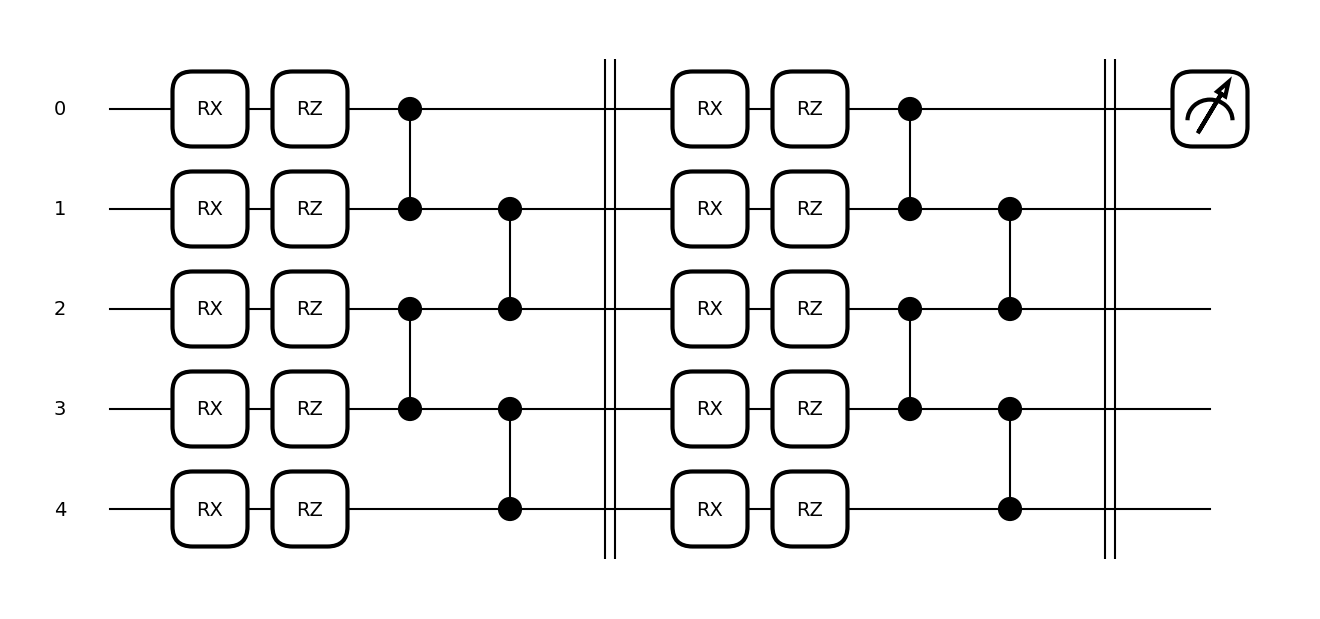

In [30]:
nqubits  = 5
nlayers  = 2
observable = qml.PauliY(0) # local observable
obs_locality = 1
# If shots is None, the simulator returns analytic results.
# If observable is None, the simulator returns the expectation value of a global observable |0><0|^{\otimes n}.

nqubits_list = []
nlayers_list = []
nsamples = 5
shots    = None

print("\n Small initialization")
initialization_method = "Small" # "Small", "Gaussian", "MBL", "Random"
bp_nqubits_ = BarrenPlateau(nqubits_list, nlayers_list, initialization_method, nsamples, shots, observable)
circuit = bp_nqubits_.make_circuit(nqubits)
params = bp_nqubits_.make_initial_params(nqubits, nlayers, obs_locality)
print(qml.draw(circuit)(params, nqubits, nlayers))

print("\n Gaussian initialization")
initialization_method = "Gaussian" # "Small", "Gaussian", "MBL", "Random"
bp_nqubits_ = BarrenPlateau(nqubits_list, nlayers_list, initialization_method, nsamples, shots, observable)
circuit = bp_nqubits_.make_circuit(nqubits)
params = bp_nqubits_.make_initial_params(nqubits, nlayers, obs_locality)
print(qml.draw(circuit)(params, nqubits, nlayers))

print("\n MBL initialization")
initialization_method = "MBL" # "Small", "Gaussian", "MBL", "Random"
bp_nqubits_ = BarrenPlateau(nqubits_list, nlayers_list, initialization_method, nsamples, shots, observable)
circuit = bp_nqubits_.make_circuit(nqubits)
params = bp_nqubits_.make_initial_params(nqubits, nlayers, obs_locality)
print(qml.draw(circuit)(params, nqubits, nlayers))

print("\n Random initialization")
initialization_method = "Random" # "Small", "Gaussian", "MBL", "Random"
bp_nqubits_ = BarrenPlateau(nqubits_list, nlayers_list, initialization_method, nsamples, shots, observable)
circuit = bp_nqubits_.make_circuit(nqubits)
params = bp_nqubits_.make_initial_params(nqubits, nlayers, obs_locality)
print(qml.draw(circuit)(params, nqubits, nlayers))

qml.draw_mpl(circuit)(params, nqubits, nlayers)

## $\text{Var}\langle \partial C(\mathbf{\theta})/\partial \theta_i\rangle$ vs the number of layers

In [1]:
import pickle
import sys

import pennylane as qml
from pennylane import numpy as np

sys.path.append('..')
from src.avoid_BP_HEA import BarrenPlateau

In [2]:
nqubits_list = [2,4,6,8,10]
nlayers_list = [10, 20, 30]
nsamples = 5; shots = None

In [3]:
# local_observable = qml.PauliY(0)
# global_observable = None
# observables = [local_observable, global_observable]
# bp_nlayers_list = []

# for initialization_method in ["Small", "Gaussian", "MBL", "Random"]
#     print("================================================")
#     print(f"initialization_method: {initialization_method}")
#     for observable in observables:
#         if observable is not None:
#             print('local observable: PauliY(0)')
#         else:
#             print('global observable: |0><0|^\otimes n')

#         bp_nlayers = BarrenPlateau(nqubits_list, nlayers_list, initialization_method, nsamples, shots, observable)
#         bp_nlayers.bp_nlayers()

#         bp_nlayers_list.append([f"{initialization_method}, {(observable is None)*'Global'+(observable is not None)*'Local'}", bp_nlayers])

In [4]:
# path = '../results/avoid_BP_HEA.pkl'
# with open(path, 'wb') as f:
#     pickle.dump(bp_nlayers_list, f)

In [5]:
path = '../results/avoid_BP_HEA.pkl'
with open(path, 'rb') as f:
    bp_nlayers_list = pickle.load(f)

Small, Local


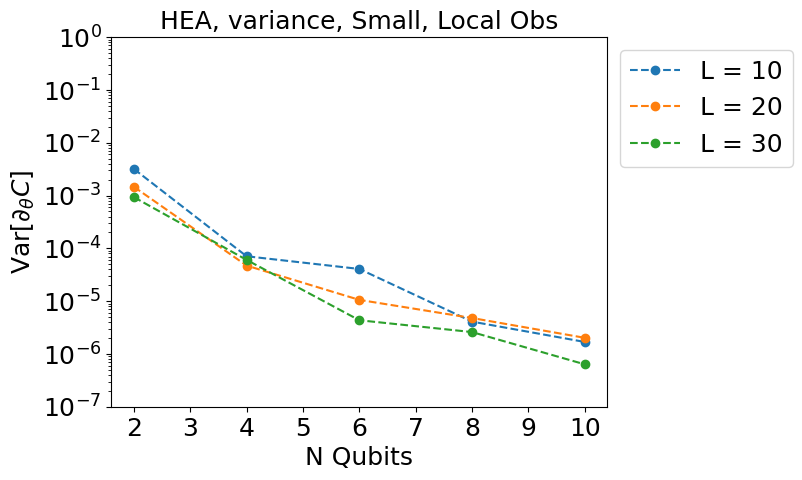

Small, Global


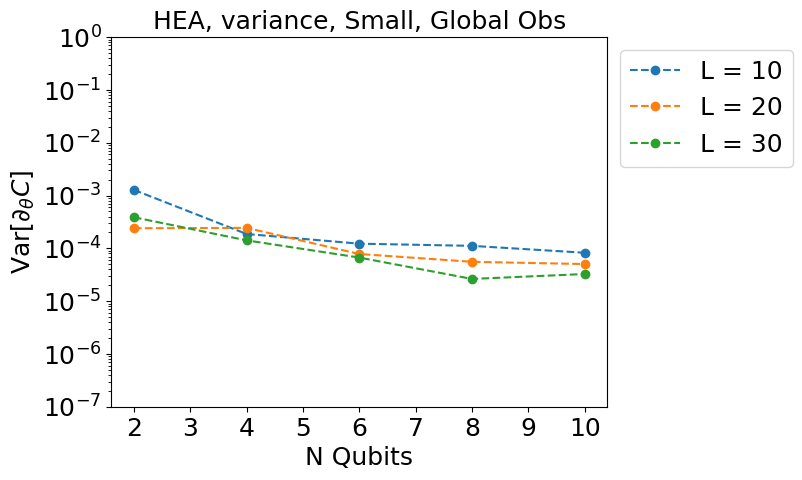

MBL, Local


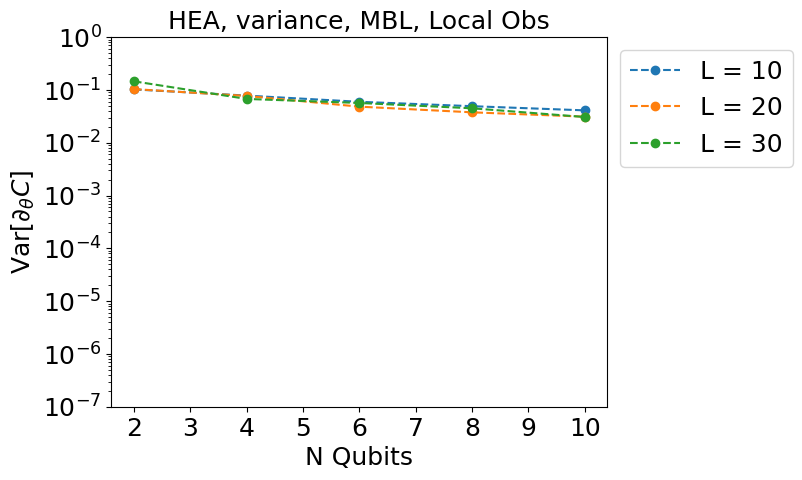

MBL, Global


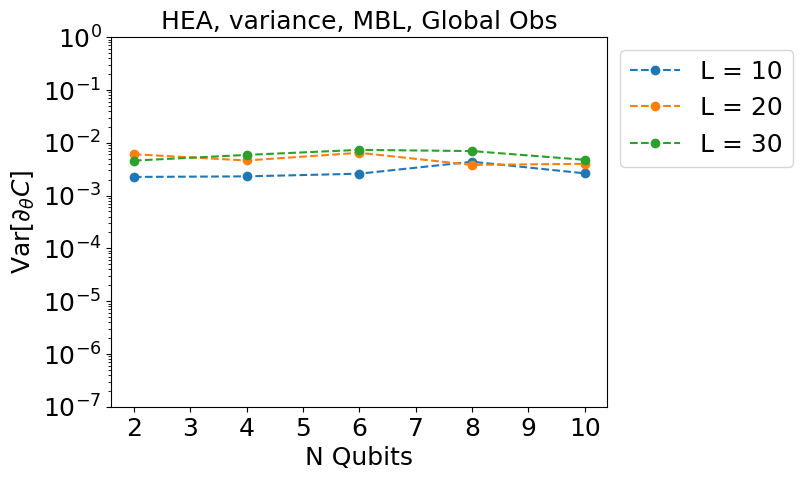

Random, Local


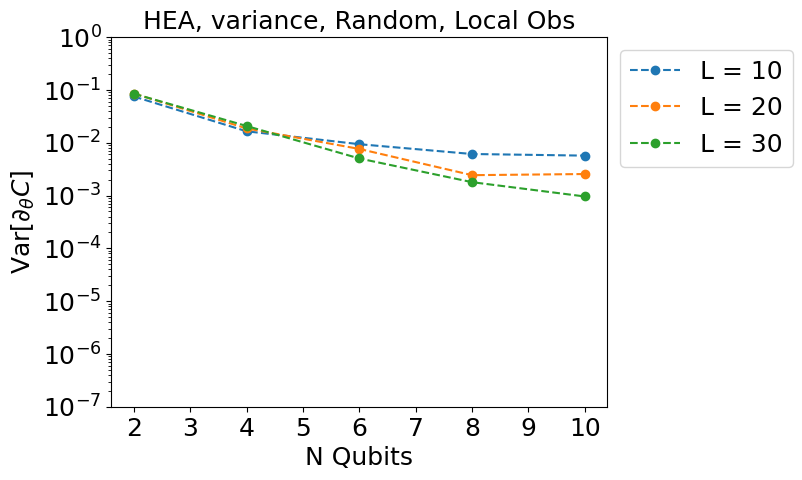

Random, Global


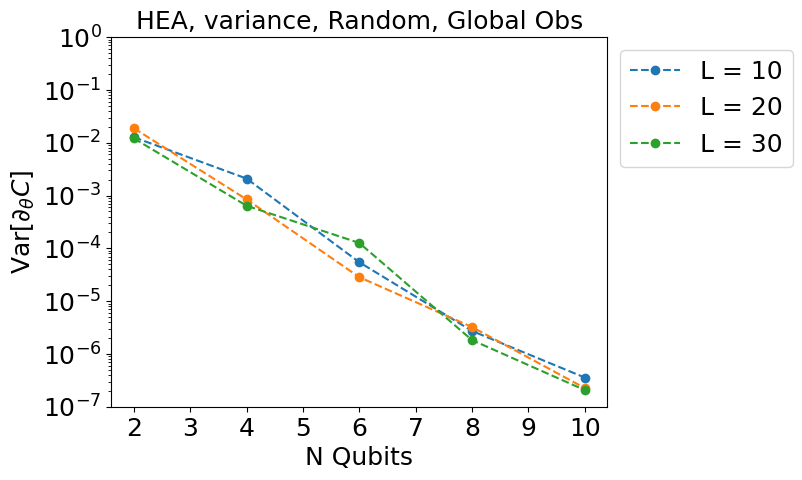

Gaussian, Local


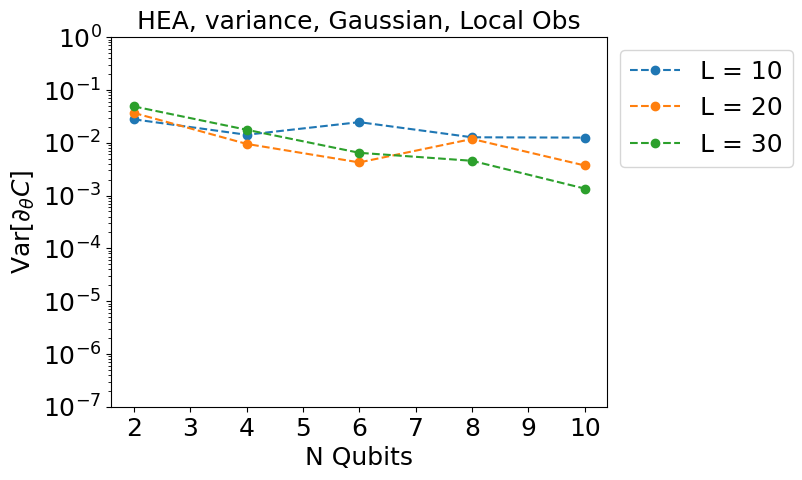

Gaussian, Global


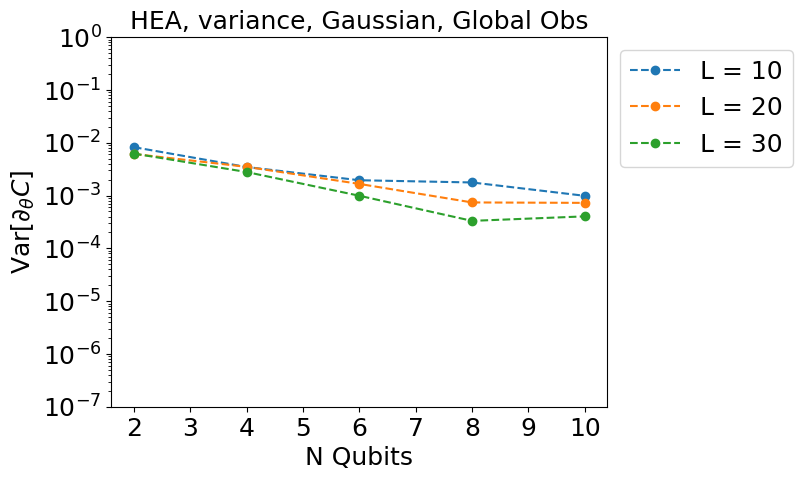

In [6]:
for bp_nlayers in bp_nlayers_list:
    print(bp_nlayers[0])
    bp_nlayers[1].plot_bp_nlayers(x_axis='nqubits', save=False, mean=False)